In [1]:
import numpy as np
import sys
sys.path.append('/eagle/fthmc/run')
from Scaling_FT_HMC.utils.func import auto_from_chi
from lametlat.utils.plot_settings import *

n_steps = 10

### L32 b3

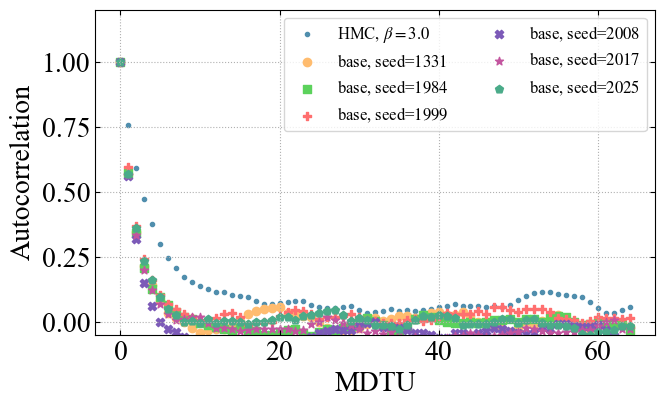

In [2]:
hmc_L32_b3_topo = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta3.0_nsteps{n_steps}.csv')

fthmc_base_L32_b3_topo_1331 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_nsteps{n_steps}_base_train_b3.0_L32_1331.csv')
fthmc_base_L32_b3_topo_1984 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_nsteps{n_steps}_base_train_b3.0_L32_1984.csv')
fthmc_base_L32_b3_topo_1999 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_nsteps{n_steps}_base_train_b3.0_L32_1999.csv')
fthmc_base_L32_b3_topo_2008 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_nsteps{n_steps}_base_train_b3.0_L32_2008.csv')
fthmc_base_L32_b3_topo_2017 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_nsteps{n_steps}_base_train_b3.0_L32_2017.csv')
fthmc_base_L32_b3_topo_2025 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_nsteps{n_steps}_base_train_b3.0_L32_2025.csv')

beta = 3.0
max_lag = 64

hmc_L32_b3_auto = auto_from_chi(hmc_L32_b3_topo, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b3_auto_1331 = auto_from_chi(fthmc_base_L32_b3_topo_1331, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b3_auto_1984 = auto_from_chi(fthmc_base_L32_b3_topo_1984, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b3_auto_1999 = auto_from_chi(fthmc_base_L32_b3_topo_1999, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b3_auto_2008 = auto_from_chi(fthmc_base_L32_b3_topo_2008, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b3_auto_2017 = auto_from_chi(fthmc_base_L32_b3_topo_2017, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b3_auto_2025 = auto_from_chi(fthmc_base_L32_b3_topo_2025, max_lag=max_lag, beta=beta, volume=32**2)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b3_auto)), hmc_L32_b3_auto, label='HMC, $\\beta=3.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_1331)), fthmc_base_L32_b3_auto_1331, label='base, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_1984)), fthmc_base_L32_b3_auto_1984, label='base, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_1999)), fthmc_base_L32_b3_auto_1999, label='base, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_2008)), fthmc_base_L32_b3_auto_2008, label='base, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_2017)), fthmc_base_L32_b3_auto_2017, label='base, seed=$2017$', marker=marker_ls[5], color=color_ls[5])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_2025)), fthmc_base_L32_b3_auto_2025, label='base, seed=$2025$', marker=marker_ls[6], color=color_ls[6])


ax.set_ylim(-0.05, 1.2)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/scaling_autocorrelation_L32_b3.pdf', transparent=True)
plt.show()


In [3]:

gamma_hmc = 1 / (1 - hmc_L32_b3_auto[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_base_L32_b3_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L32_b3_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L32_b3_auto_1999[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L32_b3_auto_2008[16])
gamma_fthmc_2017 = 1 / (1 - fthmc_base_L32_b3_auto_2017[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L32_b3_auto_2025[16])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2017 = gamma_hmc / gamma_fthmc_2017
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b3_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2017, gamma_ratio_2025])
gamma_ratio_L32_b3_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2017, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b3: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2017}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b3: {gamma_ratio_L32_b3_mean}")
print(f"std(16) for L32 b3: {gamma_ratio_L32_b3_std}")

deltaQ_hmc = [ abs(hmc_L32_b3_topo[i] - hmc_L32_b3_topo[i-1]) for i in range(1, len(hmc_L32_b3_topo))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L32_b3_topo_1331[i] - fthmc_base_L32_b3_topo_1331[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L32_b3_topo_1984[i] - fthmc_base_L32_b3_topo_1984[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L32_b3_topo_1999[i] - fthmc_base_L32_b3_topo_1999[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L32_b3_topo_2008[i] - fthmc_base_L32_b3_topo_2008[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_2008))]
deltaQ_fthmc_2017 = [ abs(fthmc_base_L32_b3_topo_2017[i] - fthmc_base_L32_b3_topo_2017[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_2017))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L32_b3_topo_2025[i] - fthmc_base_L32_b3_topo_2025[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_2025))]

deltaQ_hmc_L32_b3_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b3_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2017), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b3_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2017), np.mean(deltaQ_fthmc_2025)])


print("\n>>> deltaQ")
print(f"deltaQ for HMC L32 b3: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b3: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2017)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L32 b3: {deltaQ_fthmc_L32_b3_mean / deltaQ_hmc_L32_b3_mean}")
print(f"std(deltaQ) ratio for FTHMC L32 b3: {deltaQ_fthmc_L32_b3_std / deltaQ_hmc_L32_b3_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b3: 1.073588045833882, 1.1451765466540547, 1.121014379961446, 1.2133167303248362, 1.1422430824123853, 1.117386462960524
mean(16) for L32 b3: 1.1354542080245213
std(16) for L32 b3: 0.04196339502716587

>>> deltaQ
deltaQ for HMC L32 b3: 1.6332112332112332
deltaQ for FTHMC L32 b3: 2.2512820512820513, 2.2285714285714286, 2.168986568986569, 2.254945054945055, 2.2495726495726496, 2.242979242979243
mean(deltaQ) ratio for FTHMC L32 b3: 1.3670753588516744
std(deltaQ) ratio for FTHMC L32 b3: 0.018209733669423873


### L32 b4

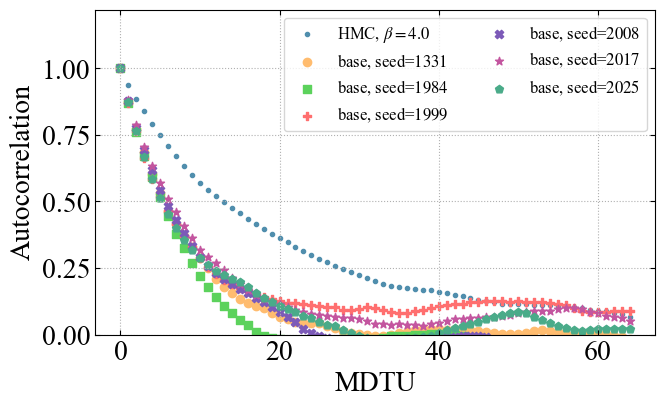

In [4]:
hmc_L32_b4_topo = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta4.0_nsteps{n_steps}.csv')
fthmc_base_L32_b4_topo_1331 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta4.0_nsteps{n_steps}_base_train_b3.0_L32_1331.csv')
fthmc_base_L32_b4_topo_1984 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta4.0_nsteps{n_steps}_base_train_b3.0_L32_1984.csv')
fthmc_base_L32_b4_topo_1999 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta4.0_nsteps{n_steps}_base_train_b3.0_L32_1999.csv')
fthmc_base_L32_b4_topo_2008 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta4.0_nsteps{n_steps}_base_train_b3.0_L32_2008.csv')
fthmc_base_L32_b4_topo_2017 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta4.0_nsteps{n_steps}_base_train_b3.0_L32_2017.csv')
fthmc_base_L32_b4_topo_2025 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta4.0_nsteps{n_steps}_base_train_b3.0_L32_2025.csv')

max_lag = 64
beta = 4.0

hmc_L32_b4_auto = auto_from_chi(hmc_L32_b4_topo, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b4_auto_1331 = auto_from_chi(fthmc_base_L32_b4_topo_1331, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b4_auto_1984 = auto_from_chi(fthmc_base_L32_b4_topo_1984, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b4_auto_1999 = auto_from_chi(fthmc_base_L32_b4_topo_1999, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b4_auto_2008 = auto_from_chi(fthmc_base_L32_b4_topo_2008, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b4_auto_2017 = auto_from_chi(fthmc_base_L32_b4_topo_2017, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b4_auto_2025 = auto_from_chi(fthmc_base_L32_b4_topo_2025, max_lag=max_lag, beta=beta, volume=32**2)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b4_auto)), hmc_L32_b4_auto, label='HMC, $\\beta=4.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L32_b4_auto_1331)), fthmc_base_L32_b4_auto_1331, label='base, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L32_b4_auto_1984)), fthmc_base_L32_b4_auto_1984, label='base, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L32_b4_auto_1999)), fthmc_base_L32_b4_auto_1999, label='base, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L32_b4_auto_2008)), fthmc_base_L32_b4_auto_2008, label='base, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L32_b4_auto_2017)), fthmc_base_L32_b4_auto_2017, label='base, seed=$2017$', marker=marker_ls[5], color=color_ls[5])
ax.scatter(np.arange(len(fthmc_base_L32_b4_auto_2025)), fthmc_base_L32_b4_auto_2025, label='base, seed=$2025$', marker=marker_ls[6], color=color_ls[6])


ax.set_ylim(0., 1.22)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/scaling_autocorrelation_L32_b4.pdf', transparent=True)
plt.show()


In [5]:
gamma_hmc = 1 / (1 - hmc_L32_b4_auto[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_base_L32_b4_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L32_b4_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L32_b4_auto_1999[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L32_b4_auto_2008[16])
gamma_fthmc_2017 = 1 / (1 - fthmc_base_L32_b4_auto_2017[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L32_b4_auto_2025[16])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2017 = gamma_hmc / gamma_fthmc_2017
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b4_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2017, gamma_ratio_2025])
gamma_ratio_L32_b4_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2017, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b4: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2017}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b4: {gamma_ratio_L32_b4_mean}")
print(f"std(16) for L32 b4: {gamma_ratio_L32_b4_std}")

deltaQ_hmc = [ abs(hmc_L32_b4_topo[i] - hmc_L32_b4_topo[i-1]) for i in range(1, len(hmc_L32_b4_topo))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L32_b4_topo_1331[i] - fthmc_base_L32_b4_topo_1331[i-1]) for i in range(1, len(fthmc_base_L32_b4_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L32_b4_topo_1984[i] - fthmc_base_L32_b4_topo_1984[i-1]) for i in range(1, len(fthmc_base_L32_b4_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L32_b4_topo_1999[i] - fthmc_base_L32_b4_topo_1999[i-1]) for i in range(1, len(fthmc_base_L32_b4_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L32_b4_topo_2008[i] - fthmc_base_L32_b4_topo_2008[i-1]) for i in range(1, len(fthmc_base_L32_b4_topo_2008))]
deltaQ_fthmc_2017 = [ abs(fthmc_base_L32_b4_topo_2017[i] - fthmc_base_L32_b4_topo_2017[i-1]) for i in range(1, len(fthmc_base_L32_b4_topo_2017))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L32_b4_topo_2025[i] - fthmc_base_L32_b4_topo_2025[i-1]) for i in range(1, len(fthmc_base_L32_b4_topo_2025))]

deltaQ_hmc_L32_b4_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b4_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2017), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b4_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2017), np.mean(deltaQ_fthmc_2025)])


print("\n>>> deltaQ")
print(f"deltaQ for HMC L32 b4: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b4: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2017)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L32 b4: {deltaQ_fthmc_L32_b4_mean / deltaQ_hmc_L32_b4_mean}")
print(f"std(deltaQ) ratio for FTHMC L32 b4: {deltaQ_fthmc_L32_b4_std / deltaQ_hmc_L32_b4_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b4: 1.554651682880465, 1.703091803645309, 1.4787263781728726, 1.4905792239740578, 1.4679917253717991, 1.4489265347198927
mean(16) for L32 b4: 1.5239945581273995
std(16) for L32 b4: 0.086557303502905

>>> deltaQ
deltaQ for HMC L32 b4: 0.6004884004884005
deltaQ for FTHMC L32 b4: 0.8669108669108669, 0.9816849816849816, 0.8881562881562881, 0.8617826617826618, 0.8380952380952381, 0.8803418803418803
mean(deltaQ) ratio for FTHMC L32 b4: 1.4757353937915143
std(deltaQ) ratio for FTHMC L32 b4: 0.07582154579112868


### L32 b5

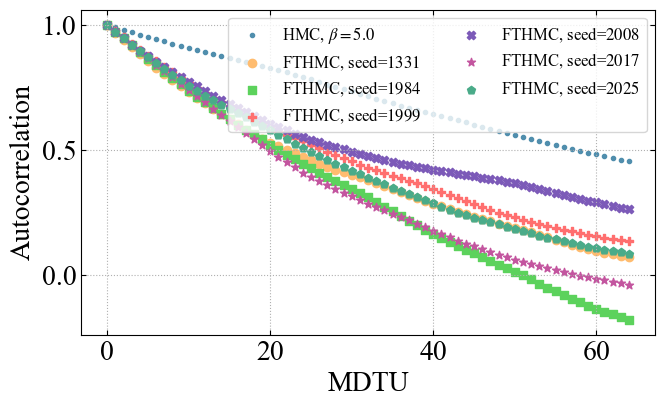

In [6]:
hmc_L32_b5_topo = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta5.0_nsteps{n_steps}.csv')
fthmc_base_L32_b5_topo_1331 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta5.0_nsteps{n_steps}_base_train_b3.0_L32_1331.csv')
fthmc_base_L32_b5_topo_1984 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta5.0_nsteps{n_steps}_base_train_b3.0_L32_1984.csv')
fthmc_base_L32_b5_topo_1999 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta5.0_nsteps{n_steps}_base_train_b3.0_L32_1999.csv')
fthmc_base_L32_b5_topo_2008 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta5.0_nsteps{n_steps}_base_train_b3.0_L32_2008.csv')
fthmc_base_L32_b5_topo_2017 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta5.0_nsteps{n_steps}_base_train_b3.0_L32_2017.csv')
fthmc_base_L32_b5_topo_2025 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta5.0_nsteps{n_steps}_base_train_b3.0_L32_2025.csv')

max_lag = 64
beta = 5.0

hmc_L32_b5_auto = auto_from_chi(hmc_L32_b5_topo, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b5_auto_1331 = auto_from_chi(fthmc_base_L32_b5_topo_1331, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b5_auto_1984 = auto_from_chi(fthmc_base_L32_b5_topo_1984, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b5_auto_1999 = auto_from_chi(fthmc_base_L32_b5_topo_1999, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b5_auto_2008 = auto_from_chi(fthmc_base_L32_b5_topo_2008, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b5_auto_2017 = auto_from_chi(fthmc_base_L32_b5_topo_2017, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b5_auto_2025 = auto_from_chi(fthmc_base_L32_b5_topo_2025, max_lag=max_lag, beta=beta, volume=32**2)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b5_auto)), hmc_L32_b5_auto, label='HMC, $\\beta=5.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L32_b5_auto_1331)), fthmc_base_L32_b5_auto_1331, label='FTHMC, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L32_b5_auto_1984)), fthmc_base_L32_b5_auto_1984, label='FTHMC, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L32_b5_auto_1999)), fthmc_base_L32_b5_auto_1999, label='FTHMC, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L32_b5_auto_2008)), fthmc_base_L32_b5_auto_2008, label='FTHMC, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L32_b5_auto_2017)), fthmc_base_L32_b5_auto_2017, label='FTHMC, seed=$2017$', marker=marker_ls[5], color=color_ls[5])
ax.scatter(np.arange(len(fthmc_base_L32_b5_auto_2025)), fthmc_base_L32_b5_auto_2025, label='FTHMC, seed=$2025$', marker=marker_ls[6], color=color_ls[6])


# ax.set_ylim(0.75, 1.1)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/scaling_autocorrelation_L32_b5.pdf', transparent=True)
plt.show()


In [7]:
gamma_hmc = 1 / (1 - hmc_L32_b5_auto[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_base_L32_b5_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L32_b5_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L32_b5_auto_1999[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L32_b5_auto_2008[16])
gamma_fthmc_2017 = 1 / (1 - fthmc_base_L32_b5_auto_2017[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L32_b5_auto_2025[16])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2017 = gamma_hmc / gamma_fthmc_2017
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b5_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2017, gamma_ratio_2025])
gamma_ratio_L32_b5_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2017, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b5: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2017}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b5: {gamma_ratio_L32_b5_mean}")
print(f"std(16) for L32 b5: {gamma_ratio_L32_b5_std}")

deltaQ_hmc = [ abs(hmc_L32_b5_topo[i] - hmc_L32_b5_topo[i-1]) for i in range(1, len(hmc_L32_b5_topo))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L32_b5_topo_1331[i] - fthmc_base_L32_b5_topo_1331[i-1]) for i in range(1, len(fthmc_base_L32_b5_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L32_b5_topo_1984[i] - fthmc_base_L32_b5_topo_1984[i-1]) for i in range(1, len(fthmc_base_L32_b5_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L32_b5_topo_1999[i] - fthmc_base_L32_b5_topo_1999[i-1]) for i in range(1, len(fthmc_base_L32_b5_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L32_b5_topo_2008[i] - fthmc_base_L32_b5_topo_2008[i-1]) for i in range(1, len(fthmc_base_L32_b5_topo_2008))]
deltaQ_fthmc_2017 = [ abs(fthmc_base_L32_b5_topo_2017[i] - fthmc_base_L32_b5_topo_2017[i-1]) for i in range(1, len(fthmc_base_L32_b5_topo_2017))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L32_b5_topo_2025[i] - fthmc_base_L32_b5_topo_2025[i-1]) for i in range(1, len(fthmc_base_L32_b5_topo_2025))]

deltaQ_hmc_L32_b5_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b5_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2017), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b5_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2017), np.mean(deltaQ_fthmc_2025)])

print("\n>>> deltaQ")
print(f"deltaQ for HMC L32 b5: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b5: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2017)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L32 b5: {deltaQ_fthmc_L32_b5_mean / deltaQ_hmc_L32_b5_mean}")
print(f"std(deltaQ) ratio for FTHMC L32 b5: {deltaQ_fthmc_L32_b5_std / deltaQ_hmc_L32_b5_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b5: 2.8111078546307158, 2.812719812426729, 2.4025498241500585, 2.3506740914419693, 2.8893610785463077, 2.4882766705744443
mean(16) for L32 b5: 2.6257815552950374
std(16) for L32 b5: 0.2172517855937107

>>> deltaQ
deltaQ for HMC L32 b5: 0.12332112332112333
deltaQ for FTHMC L32 b5: 0.2757020757020757, 0.2537240537240537, 0.2398046398046398, 0.24468864468864468, 0.24126984126984127, 0.25934065934065936
mean(deltaQ) ratio for FTHMC L32 b5: 2.046864686468647
std(deltaQ) ratio for FTHMC L32 b5: 0.10122064325654168


### L32 b6

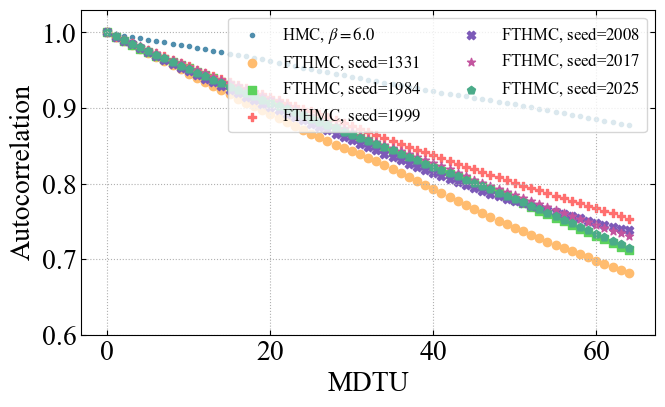

In [8]:
hmc_L32_b6_topo = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta6.0_nsteps{n_steps}.csv')
fthmc_base_L32_b6_topo_1331 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_nsteps{n_steps}_base_train_b3.0_L32_1331.csv')
fthmc_base_L32_b6_topo_1984 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_nsteps{n_steps}_base_train_b3.0_L32_1984.csv')
fthmc_base_L32_b6_topo_1999 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_nsteps{n_steps}_base_train_b3.0_L32_1999.csv')
fthmc_base_L32_b6_topo_2008 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_nsteps{n_steps}_base_train_b3.0_L32_2008.csv')
fthmc_base_L32_b6_topo_2017 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_nsteps{n_steps}_base_train_b3.0_L32_2017.csv')
fthmc_base_L32_b6_topo_2025 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_nsteps{n_steps}_base_train_b3.0_L32_2025.csv')

max_lag = 64
beta = 6.0

hmc_L32_b6_auto = auto_from_chi(hmc_L32_b6_topo, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b6_auto_1331 = auto_from_chi(fthmc_base_L32_b6_topo_1331, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b6_auto_1984 = auto_from_chi(fthmc_base_L32_b6_topo_1984, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b6_auto_1999 = auto_from_chi(fthmc_base_L32_b6_topo_1999, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b6_auto_2008 = auto_from_chi(fthmc_base_L32_b6_topo_2008, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b6_auto_2017 = auto_from_chi(fthmc_base_L32_b6_topo_2017, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b6_auto_2025 = auto_from_chi(fthmc_base_L32_b6_topo_2025, max_lag=max_lag, beta=beta, volume=32**2)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b6_auto)), hmc_L32_b6_auto, label='HMC, $\\beta=6.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_1331)), fthmc_base_L32_b6_auto_1331, label='FTHMC, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_1984)), fthmc_base_L32_b6_auto_1984, label='FTHMC, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_1999)), fthmc_base_L32_b6_auto_1999, label='FTHMC, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_2008)), fthmc_base_L32_b6_auto_2008, label='FTHMC, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_2017)), fthmc_base_L32_b6_auto_2017, label='FTHMC, seed=$2017$', marker=marker_ls[5], color=color_ls[5])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_2025)), fthmc_base_L32_b6_auto_2025, label='FTHMC, seed=$2025$', marker=marker_ls[6], color=color_ls[6])


ax.set_ylim(0.6, 1.03)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/scaling_autocorrelation_L32_b6.pdf', transparent=True)
plt.show()


In [9]:
gamma_hmc = 1 / (1 - hmc_L32_b6_auto[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_base_L32_b6_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L32_b6_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L32_b6_auto_1999[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L32_b6_auto_2008[16])
gamma_fthmc_2017 = 1 / (1 - fthmc_base_L32_b6_auto_2017[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L32_b6_auto_2025[16])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2017 = gamma_hmc / gamma_fthmc_2017
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b6_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2017, gamma_ratio_2025])
gamma_ratio_L32_b6_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2017, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b6: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2017}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b6: {gamma_ratio_L32_b6_mean}")
print(f"std(16) for L32 b6: {gamma_ratio_L32_b6_std}")

deltaQ_hmc = [ abs(hmc_L32_b6_topo[i] - hmc_L32_b6_topo[i-1]) for i in range(1, len(hmc_L32_b6_topo))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L32_b6_topo_1331[i] - fthmc_base_L32_b6_topo_1331[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L32_b6_topo_1984[i] - fthmc_base_L32_b6_topo_1984[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L32_b6_topo_1999[i] - fthmc_base_L32_b6_topo_1999[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L32_b6_topo_2008[i] - fthmc_base_L32_b6_topo_2008[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_2008))]
deltaQ_fthmc_2017 = [ abs(fthmc_base_L32_b6_topo_2017[i] - fthmc_base_L32_b6_topo_2017[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_2017))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L32_b6_topo_2025[i] - fthmc_base_L32_b6_topo_2025[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_2025))]

deltaQ_hmc_L32_b6_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b6_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2017), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b6_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2017), np.mean(deltaQ_fthmc_2025)])

print("\n>>> deltaQ")
print(f"deltaQ for HMC L32 b6: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b6: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2017)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L32 b6: {deltaQ_fthmc_L32_b6_mean / deltaQ_hmc_L32_b6_mean}")
print(f"std(deltaQ) ratio for FTHMC L32 b6: {deltaQ_fthmc_L32_b6_std / deltaQ_hmc_L32_b6_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b6: 2.943917169974119, 2.509059534081105, 2.3425366695427132, 2.697152717860229, 2.392579810181195, 2.5591026747195906
mean(16) for L32 b6: 2.5740580960598254
std(16) for L32 b6: 0.20121838772076034

>>> deltaQ
deltaQ for HMC L32 b6: 0.021001221001221003
deltaQ for FTHMC L32 b6: 0.043467643467643466, 0.04493284493284493, 0.04542124542124542, 0.045177045177045176, 0.041025641025641026, 0.042735042735042736
mean(deltaQ) ratio for FTHMC L32 b6: 2.085271317829457
std(deltaQ) ratio for FTHMC L32 b6: 0.07465643521030316


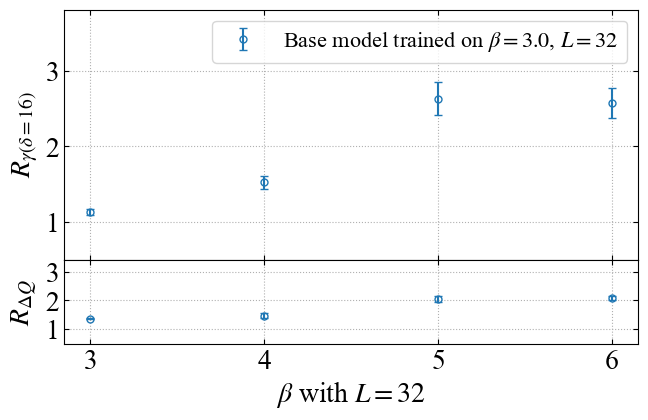

In [10]:

fig, (ax1, ax2) = default_sub_plot()
# Adjust subplot spacing
plt.subplots_adjust(left=0.1,    # Increase left margin
                    right=0.95,    # Decrease right margin
                    bottom=0.15,   # Increase bottom margin 
                    top=0.95)      # Decrease top margin

ax1.errorbar(np.arange(3, 7), [gamma_ratio_L32_b3_mean, gamma_ratio_L32_b4_mean, gamma_ratio_L32_b5_mean, gamma_ratio_L32_b6_mean], yerr=[gamma_ratio_L32_b3_std, gamma_ratio_L32_b4_std, gamma_ratio_L32_b5_std, gamma_ratio_L32_b6_std], label='Base model trained on $\\beta=3.0$, $L=32$', **errorb_circle)
ax2.errorbar(np.arange(3, 7), [deltaQ_fthmc_L32_b3_mean / deltaQ_hmc_L32_b3_mean, deltaQ_fthmc_L32_b4_mean / deltaQ_hmc_L32_b4_mean, deltaQ_fthmc_L32_b5_mean / deltaQ_hmc_L32_b5_mean, deltaQ_fthmc_L32_b6_mean / deltaQ_hmc_L32_b6_mean], yerr=[deltaQ_fthmc_L32_b3_std / deltaQ_hmc_L32_b3_mean, deltaQ_fthmc_L32_b4_std / deltaQ_hmc_L32_b4_mean, deltaQ_fthmc_L32_b5_std / deltaQ_hmc_L32_b5_mean, deltaQ_fthmc_L32_b6_std / deltaQ_hmc_L32_b6_mean], **errorb_circle)
ax1.set_ylabel('$R_{\\gamma (\\delta =16)}$', **fs_p)
ax1.set_ylim(0.5, 3.8)
ax2.set_xlabel('$\\beta$ with $L=32$', **fs_p)
ax2.set_ylabel('$R_{\\Delta Q}$', **fs_p)
ax2.set_ylim(0.5, 3.4)
ax1.legend(ncol=2, loc='upper right', **fs_small_p)
# plt.tight_layout()
plt.savefig('plots/scaling_performance_L32.pdf', transparent=True)
plt.show()